In [2]:
%run imports.ipynb

warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
pandas.options.mode.chained_assignment = None  # default='warn'


### The sample

The cell below plots the chosen parameters (density) of the sample of planet pairs againsa each other. The solar system planets are indicated by red dots. The cell also calculates the Pearson coefficients and the amount of pairs above and below the unity line.

Systems: 115
Pearson Correlation Coefficient for density data:  0.26532001107120523 and a P-value of: 0.0005297301584375902
Upper side of the line, planets: 59 , part: 0.353
Lower side of the line, planets: 108 , part: 0.647
On the line, planets: 0


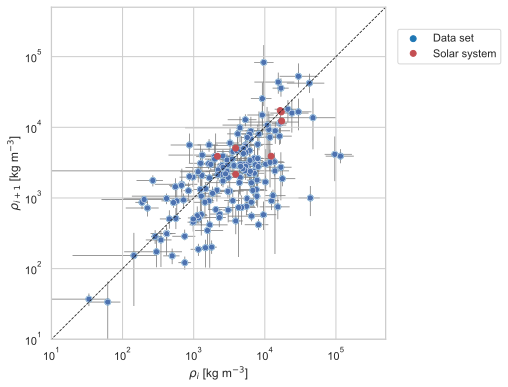

In [25]:
workingTableExoplanets = pandas.read_pickle("../data/MRP_data_sets.pkl")

workingTableExoplanets['density-1'] = (workingTableExoplanets["mass-1"] * mass_coeff * constants.M_earth) * 3 /(4 * numpy.pi*numpy.power(workingTableExoplanets["radius-1"] * radius_coeff * constants.R_earth,3))
workingTableExoplanets['density-2'] = (workingTableExoplanets["mass-2"] * mass_coeff * constants.M_earth) * 3 /(4 * numpy.pi*numpy.power(workingTableExoplanets["radius-2"] * radius_coeff * constants.R_earth,3))

workingTableExoplanets['density_error_min-1'] = numpy.sqrt((workingTableExoplanets["mass_error_min-1"]/workingTableExoplanets["mass-1"]) ** 2 + (3 * workingTableExoplanets["radius_error_min-1"]/workingTableExoplanets["radius-1"]) ** 2) * workingTableExoplanets['density-1']# assigned to a column
workingTableExoplanets['density_error_min-1wr'] = numpy.sqrt((workingTableExoplanets["mass_error_min-1"]/workingTableExoplanets["mass-1"]) ** 2 + (3 *  workingTableExoplanets["radius_error_min-1"]/workingTableExoplanets["radius-1"]) ** 2) * workingTableExoplanets['density-1']
# print(workingTableExoplanets['density_error_min-1']/workingTableExoplanets['density_error_min-1wr'])
workingTableExoplanets['density_error_max-1'] = numpy.sqrt((workingTableExoplanets["mass_error_max-1"]/workingTableExoplanets["mass-1"]) ** 2 +  (3 * workingTableExoplanets["radius_error_max-1"]/workingTableExoplanets["radius-1"]) ** 2) * workingTableExoplanets['density-1']
workingTableExoplanets['density_error_min-2'] = numpy.sqrt((workingTableExoplanets["mass_error_min-2"]/workingTableExoplanets["mass-2"]) ** 2 + (3 * workingTableExoplanets["radius_error_min-2"]/workingTableExoplanets["radius-2"]) ** 2) * workingTableExoplanets['density-2']# assigned to a column
workingTableExoplanets['density_error_max-2'] = numpy.sqrt((workingTableExoplanets["mass_error_max-2"]/workingTableExoplanets["mass-2"]) ** 2 + (3 * workingTableExoplanets["radius_error_max-2"]/workingTableExoplanets["radius-2"]) ** 2) * workingTableExoplanets['density-2']

planetstodrop = []


workingTableExoplanets = workingTableExoplanets[~workingTableExoplanets['mass_detection_type'].isin(['Theoretical'])]
workingTableExoplanets = workingTableExoplanets.query("`ima_flag`.isna()")


workingTableExoplanets = workingTableExoplanets.query("`mass-1`.notna() & `mass-2`.notna()")
workingTableExoplanets = workingTableExoplanets.query("`mass_error_min-1`.notna() & `mass_error_max-1`.notna() & `mass_error_min-2`.notna() & `mass_error_max-2`")
workingTableExoplanets = workingTableExoplanets.query("`pl_massjlim`.isnull()")
workingTableExoplanets = workingTableExoplanets.query("`radius-1`.notna() & `radius-2`.notna()")
workingTableExoplanets = workingTableExoplanets.query("`radius_error_min-1`.notna() & `radius_error_max-1`.notna() & `radius_error_min-2`.notna() & `radius_error_max-2`")
workingTableExoplanets = workingTableExoplanets.query("`pl_radjlim`.isnull()")

for index, row in workingTableExoplanets.iterrows():
    if (abs(workingTableExoplanets.at[index,"density_error_min-1"]) + workingTableExoplanets.at[index,"density_error_max-1"])/workingTableExoplanets.at[index,"density-1"] >= 2.0:
        planetstodrop.append(index)
    if (abs(workingTableExoplanets.at[index,"density_error_min-2"]) + workingTableExoplanets.at[index,"density_error_max-2"])/workingTableExoplanets.at[index,"density-2"] >= 2.0:
        planetstodrop.append(index)



workingTableExoplanets = workingTableExoplanets.drop(index=planetstodrop)

density_1 = workingTableExoplanets['density-1']
density_2 = workingTableExoplanets['density-2']
mass_1 = workingTableExoplanets['mass-1']
mass_2 = workingTableExoplanets['mass-2']
radius_1 = workingTableExoplanets['radius-1']
radius_2 = workingTableExoplanets['radius-2']
resultsExoplanetsm2 = workingTableExoplanets.query("`density-2` > `density-1`")
resultsExoplanetsm1 = workingTableExoplanets.query("`density-2` < `density-1`")
resultsExoplanetsmeq = workingTableExoplanets.query("`density-2` == `density-1`")

seaborn.set_theme(style="whitegrid")

star_age = workingTableExoplanets["star_age"]
star_teff = workingTableExoplanets["star_teff"]
star_mass = workingTableExoplanets["star_mass"]
star_radius = workingTableExoplanets["star_radius"]
star_metallicity = workingTableExoplanets["star_metallicity"]
star_rotp = workingTableExoplanets["st_rotp"]
# with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(workingTableExoplanets.sort_values("star_name"))
print("Systems:", len(numpy.unique(workingTableExoplanets["star_name"])))
pearson_coef, p_value = stats.pearsonr(density_1, density_2) #define the columns to perform calculations on
print("Pearson Correlation Coefficient for density data: ", pearson_coef, "and a P-value of:", p_value) # Results

cmap = seaborn.cubehelix_palette(rot=-.3, as_cmap=True)

fig, ax =plt.subplots(figsize=(6,6))
slope, intercept, r_value, p_value, std_err = stats.linregress(density_1,density_2)

g1 = seaborn.scatterplot(
    x='density-1', y='density-2',data=workingTableExoplanets,
    palette=cmap,
    ax=ax)
g1.set(xscale="log", yscale="log")

g1.set(ylim=(10, 500000))
g1.set(xlim=(10, 500000))
x = numpy.linspace(0.001, 500000, 2000)
y = x
plt.plot(x, y, linewidth=0.8, linestyle='--', color='k')
xerr = numpy.nan_to_num(workingTableExoplanets[['density_error_min-1','density_error_max-1']].to_numpy().T, posinf=0.)
yerr = numpy.nan_to_num(workingTableExoplanets[['density_error_min-2','density_error_max-2']].to_numpy().T, posinf=0.)

plt.errorbar(workingTableExoplanets['density-1'], workingTableExoplanets['density-2'] , xerr=numpy.abs(xerr), yerr=numpy.abs(yerr), ls='none', fmt='0.8', ecolor='tab:gray', elinewidth=0.8, capsize=None, barsabove=True, zorder=0)
plt.scatter(workingTableExoplanets['density-1'] , workingTableExoplanets['density-2'] , marker="o", facecolor='tab:blue', zorder=0, label="Data set")

# plt.text(300000, 100,f'PC:{(pearson_coef).round(3)}, p value = {p_value:.2E}', fontsize=10)
solarsystemTable = pandas.read_pickle("../data/solarsystem.pkl")
massS = solarsystemTable["massJ"] * mass_coeff
radiusS = solarsystemTable["radiusJ"] * radius_coeff

density_S = (massS * constants.M_earth) * 3 /(4 * numpy.power(radiusS * constants.R_earth,3))


for i in range(len(density_S)-1):
    if i == 1:
        plt.plot(density_S[i], density_S[i+1], 'ro', ms=6, zorder=1, label="Solar system")

    else:
        plt.plot(density_S[i], density_S[i+1], 'ro', ms=6, zorder=1)

print(f'Upper side of the line, planets:', len(resultsExoplanetsm2), ', part:', numpy.round(len(resultsExoplanetsm2)/ len(workingTableExoplanets), 3))
print(f'Lower side of the line, planets:', len(resultsExoplanetsm1), ', part:', numpy.round(len(resultsExoplanetsm1)/ len(workingTableExoplanets), 3))
print(f'On the line, planets:', len(resultsExoplanetsmeq))
plt.legend(bbox_to_anchor=(1.02, 0.95))

plt.ylabel(r'$\rho_{i+1}$ [kg m$^{-3}$]')
plt.xlabel(r'$\rho_i$ [kg m$^{-3}$]');


### Bootstrap test

The cell below works with  high-correlated subsamples among systems with analogous stellar parameters. It bootstraps random 40-pairs subsamples from the main sample, hence the Person coefficient for these subsamples will differ every run.

Upper side of the line, planets: 17 , part: 0.425
Lower side of the line, planets: 23 , part: 0.575
On the line, planets: 0
Pearson Correlation Coefficient for raw data:  0.8547027730660782 and a P-value of: 2.257127279246048e-12


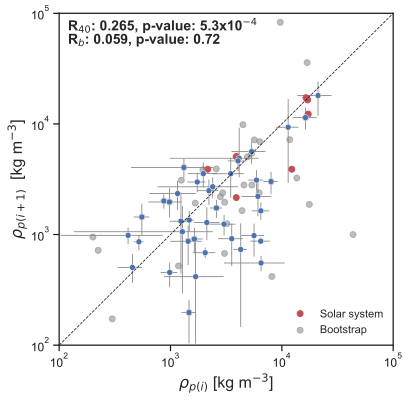

In [29]:
tableEX2 = pandas.read_pickle("../data/104_0.8547027730660782_star_age_density.pkl")

density_11 = tableEX2["density-1"]
density_22 = tableEX2["density-2"]
star_age = tableEX2["star_age"]
star_teff = tableEX2["star_teff"]
star_mass = tableEX2["star_mass"]
star_radius = tableEX2["star_radius"]
star_metallicity = tableEX2["star_metallicity"]
star_rotp = tableEX2["st_rotp"]
def decimal(b):
    a = numpy.log10(b)
    frac1, whole1 = math.modf(a)
    b2 = whole1 - 1
    b1 = b * 10 ** abs(b2)
    return b1, b2
p_value1, p_value2 = decimal(p_value)
seaborn.set_theme(style="white")
fig,ax = plt.subplots(figsize=(6,6))
plt.rcParams['figure.figsize']=(6,6)
cmap = seaborn.cubehelix_palette(rot=-.3, as_cmap=True)
g = seaborn.scatterplot(
    x=density_11, y=density_22,
    # hue=errror_frac,
    # hue_norm=(0,10000),
    legend=False,
    palette=cmap,
    zorder=2,
    ax=ax
)
g.set(xscale="log", yscale="log")

g.set(ylim=(100, 100000))
g.set(xlim=(100, 100000))

# with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(tableEX2.sort_values("star_metallicity"))
resultsExoplanetsm2 = tableEX2.query("`density-2` > `density-1`")
resultsExoplanetsm1 = tableEX2.query("`density-2` < `density-1`")
resultsExoplanetsmeq = tableEX2.query("`density-2` == `density-1`")


print(f'Upper side of the line, planets:', len(resultsExoplanetsm2), ', part:', numpy.round(len(resultsExoplanetsm2)/ len(tableEX2), 3))
print(f'Lower side of the line, planets:', len(resultsExoplanetsm1), ', part:', numpy.round(len(resultsExoplanetsm1)/ len(tableEX2), 3))
print(f'On the line, planets:', len(resultsExoplanetsmeq))

pearson_coef1, p_value3 = stats.pearsonr(density_11, density_22) #define the columns to perform calculations on
print("Pearson Correlation Coefficient for raw data: ", pearson_coef1, "and a P-value of:", p_value3) # Results

xerr = numpy.nan_to_num(tableEX2[["density_error_min-1", "density_error_max-1"]].to_numpy().T, posinf=0.)
yerr = numpy.nan_to_num(tableEX2[["density_error_min-2", "density_error_max-2"]].to_numpy().T, posinf=0.)

plt.text(120, 70000,f"R$_{{40}}$: {(pearson_coef).round(3)}, p-value: {p_value1.round(2)}x10$^{{{round(p_value2)}}}$", fontsize=14,weight='bold')
cmap = seaborn.cubehelix_palette(rot=-.6, as_cmap=True)

x = numpy.linspace(100, 100000, 200)
y = x
plt.plot(x, y, linewidth=0.8, linestyle='--', color='k')



plt.errorbar(density_11, density_22, xerr=numpy.abs(xerr), yerr=numpy.abs(yerr), ls='none', fmt='0.8', ecolor='tab:gray', elinewidth=0.8, capsize=None, barsabove=True, zorder=-1)

solarsystemTable = pandas.read_pickle("../data/solarsystem.pkl")
radiusS = solarsystemTable["radiusJ"] * radius_coeff
massS = solarsystemTable["massJ"] * mass_coeff

density_S = (massS * constants.M_earth) * 3 /(4 * numpy.power(radiusS * constants.R_earth,3))


for i in range(len(density_S)-1):
    if i == 1:
        plt.plot(density_S[i], density_S[i+1], 'ro', ms=6, zorder=1, label="Solar system")

    else:
        plt.plot(density_S[i], density_S[i+1], 'ro', ms=6, zorder=1)


bootstrap = workingTableExoplanets.sample(n=40)
plt.scatter(bootstrap["density-1"], bootstrap["density-2"],

            facecolor ='tab:gray', alpha = 0.5, zorder=1, label="Bootstrap")

pearson_coefB, p_valueB = stats.pearsonr(bootstrap["density-1"], bootstrap["density-2"])

plt.text(120,53000,f'R$_b$: {(pearson_coefB).round(3)}, p-value: {(p_valueB).round(3)}', fontsize=14,weight='bold')
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
for spine in ax.spines.values():
    spine.set_edgecolor('k')
ax.set_ylabel('', fontsize=14)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y',labelsize=12)
ax.tick_params(color='k', labelcolor='k',which = 'major')
plt.minorticks_off()

plt.legend(loc="lower right", frameon=False)
plt.xlabel(r"$\rho_{p(i)}$ [kg m$^{-3}$]", fontsize=16)
plt.ylabel(r"$\rho_{p(i+1)}$  [kg m$^{-3}$]", fontsize=16);


### Bootstrap R value distribution
The cell below 10$^5$ bootstraps 40 pairs random subsamples from the main sample and plots the distribution. The R values of the high-correlated subsamples among systems with analogous age or metallicity plotted by dashed lines, the former - blue and the latter - black.

density total planets:64
density total systems:24
Pearson Correlation Coefficient for data:  0.8547027730660782 and a P-value of: 2.257127279246048e-12
Pearson Correlation Coefficient for data:  0.8841410883935338 and a P-value of: 3.994852041188129e-14
p-value=1.10e-06
R-value median for Bootstrap: 0.3568610017304801
Confidence intervals for Bootstrap: [0.21674365 0.482572  ]


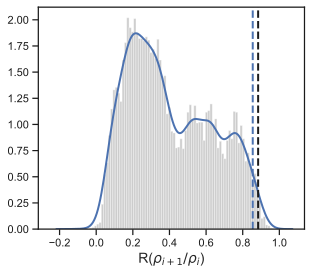

In [32]:
chunk_data = pandas.read_pickle("../data/104_0.8547027730660782_star_age_density.pkl")

density_chunk1 = chunk_data["density-1"]
density_chunk2 = chunk_data["density-2"]

granule_1u = numpy.unique(chunk_data["granule_uid-1"])
granule_2u = numpy.unique(chunk_data["granule_uid-2"])
granule = list(granule_1u)
granule.extend(x for x in granule_2u if x not in granule)
print(f"density total planets:{len(granule)}")
sys_len =len(numpy.unique(chunk_data["star_name"]))
print(f"density total systems:{sys_len}")
pearson_coef1, p_value1 = stats.pearsonr(density_chunk1, density_chunk2) #define the columns to perform calculations on
print("Pearson Correlation Coefficient for data: ", pearson_coef1, "and a P-value of:", p_value1)
spearman_coef1, s_value1 = stats.spearmanr(density_chunk1, density_chunk2)

chunk_data1 = pandas.read_pickle("../data/31_0.8841410883935338_star_metallicity_density.pkl")

density_chunk11 = chunk_data1["density-1"]
density_chunk12 = chunk_data1["density-2"]
pearson_coef2, p_value2 = stats.pearsonr(density_chunk11, density_chunk12)
print("Pearson Correlation Coefficient for data: ", pearson_coef2, "and a P-value of:", p_value2)

Pearson = []
PvalPe = []
Spearman = []
PvalSp = []
for i in range(10000):
    pearson_coef = 0.
    p_value = 0.
    spearman_coef = 0.
    s_value = 0.
    newtable =  workingTableExoplanets.sample(n=40)



    density_1 = newtable["density-1"]
    density_2 = newtable["density-2"]


    pearson_coef, p_value = stats.pearsonr(density_1, density_2)
    Pearson.append(pearson_coef)
    PvalPe.append(p_value)
    Spearman.append(spearman_coef)
    PvalSp.append(s_value)
# print(Pearson)
fig, ax = plt.subplots(figsize=(4.5,4))
ax.grid(False)

a = numpy.linspace(-0.25,1,100)
c = numpy.linspace(0,1,50)

b = numpy.logspace(-6,1,50)

e=numpy.median(Pearson)
z1 = numpy.arctanh(e)

sigma1 = (1/((len(workingTableExoplanets)-3)**0.5))


cint1 = z1 + numpy.array([-1, 1]) * sigma1 * stats.norm.ppf((1+0.95)/2)


confidence_intervals1 =  numpy.tanh(cint1)
df = len(workingTableExoplanets) - 2
t = e * numpy.sqrt(df/(1 - e**2))
p = stats.t.sf(t, df)
print(f"p-value={'{:.2e}'.format(p)}")
seaborn.distplot(Pearson, hist=True, kde=True, kde_kws={"color": "b", "lw": 2},bins=a, hist_kws={"color": "tab:gray"}, ax=ax)

print(f"R-value median for Bootstrap: {e}")
print(f"Confidence intervals for Bootstrap: {confidence_intervals1}")

ax.axvline(pearson_coef1,color="b",linewidth=2,linestyle='--')
ax.axvline(pearson_coef2,color="k",linewidth=2, linestyle='--')
ax.set_xlabel(r'R($\rho_{{i+1}}/\rho_{{i}}$)', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.tick_params(color='k', labelcolor='k')
for spine in ax.spines.values():
    spine.set_edgecolor('k')
ax.set_ylabel('', fontsize=14)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


plt.tight_layout()